Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [ ]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the dataset
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv



Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 19.3MB/s]


# 1. Basic Analysis and Data Exploration

In [ ]:
df = pd.read_csv("aerofit_treadmill.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


*Finding the Shape of the dataframe*


In [ ]:
df.shape

(180, 9)

Insights-
- There are totally 180 rows and 9 columns




*Finding the unique values in each column*

In [ ]:
def unique_values():
  for i in df.columns:
    if df[i].dtype == 'int64':
      print(f"Unique values in {i} column are")
      print(np.sort(df[i].unique()), end='\n\n')

    else:
      print(f"Unique values in {i} column are")
      print(df[i].unique(), end='\n\n')

unique_values()

Unique values in Product column are
['KP281' 'KP481' 'KP781']

Unique values in Age column are
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 50]

Unique values in Gender column are
['Male' 'Female']

Unique values in Education column are
[12 13 14 15 16 18 20 21]

Unique values in MaritalStatus column are
['Single' 'Partnered']

Unique values in Usage column are
[2 3 4 5 6 7]

Unique values in Fitness column are
[1 2 3 4 5]

Unique values in Income column are
[ 29562  30699  31836  32973  34110  35247  36384  37521  38658  39795
  40932  42069  43206  44343  45480  46617  47754  48556  48658  48891
  49801  50028  51165  52290  52291  52302  53439  53536  54576  54781
  55713  56850  57271  57987  58516  59124  60261  61006  61398  62251
  62535  64741  64809  65220  67083  68220  69721  70966  74701  75946
  77191  83416  85906  88396  89641  90886  92131  95508  95866  99601
 103336 104581]

Unique values in Miles column are
[ 21  38  

- The unique values are consolidated and sorted based on their datatype for the ease of analysis.



*Finding if the columns are properly structured and making sure that there are no nested values*

In [ ]:
def nested_values_check():
  df_check = df.copy() # Creating a copy to have the main dataframe unaffected.
  for i in df_check.columns:
    df_check[i] = df_check[i].astype('str')
    if df_check[i].str.contains(',').any()==False:
      print(f"{i} column--> Structured Properly", end = '\n\n')
    else:
      print(f"{i} column--> has Nested values", end = '\n\n')
nested_values_check()

Product column--> Structured Properly

Age column--> Structured Properly

Gender column--> Structured Properly

Education column--> Structured Properly

MaritalStatus column--> Structured Properly

Usage column--> Structured Properly

Fitness column--> Structured Properly

Income column--> Structured Properly

Miles column--> Structured Properly



It is clear that the data in out dataset is clean and structured properly to suit our analysis.

*Using the describe function to have an overall idea of the dataset*

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.describe(include = 'object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


*Creating new columns*
- We can notice that some columns can be used on both categorical and the numerical front, so adding new columns below.

In [ ]:
df['MilesPerSession'] = df['Miles']/df['Usage']
df['age_category'] = pd.cut(df['Age'], bins = [17,25,40,60,120], labels = ['Young Adult','Adult','Middle Age','Old Ae'])
df['Education_level'] = pd.cut(df['Education'], bins = [9,12,15,21], labels = ['Primary','Secondary','Higher Education'])
df['Income_category'] = pd.cut(df['Income'], bins = [25000,35000,60000,80000,200000], labels = ['Low Income','Average Income','High Income','Very High Income'])
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,MilesPerSession,age_category,Education_level,Income_category
0,KP281,18,Male,14,Single,3,4,29562,112,37.333333,Young Adult,Secondary,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,37.500000,Young Adult,Secondary,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,16.500000,Young Adult,Secondary,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,28.333333,Young Adult,Primary,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,11.750000,Young Adult,Secondary,Average Income


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles,MilesPerSession
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444,29.412341
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605,9.229772
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000,10.500000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000,23.500000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000,28.333333
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000,33.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000,90.000000


# 2. Univariate Analysis

# 2.1 Numerical Variables

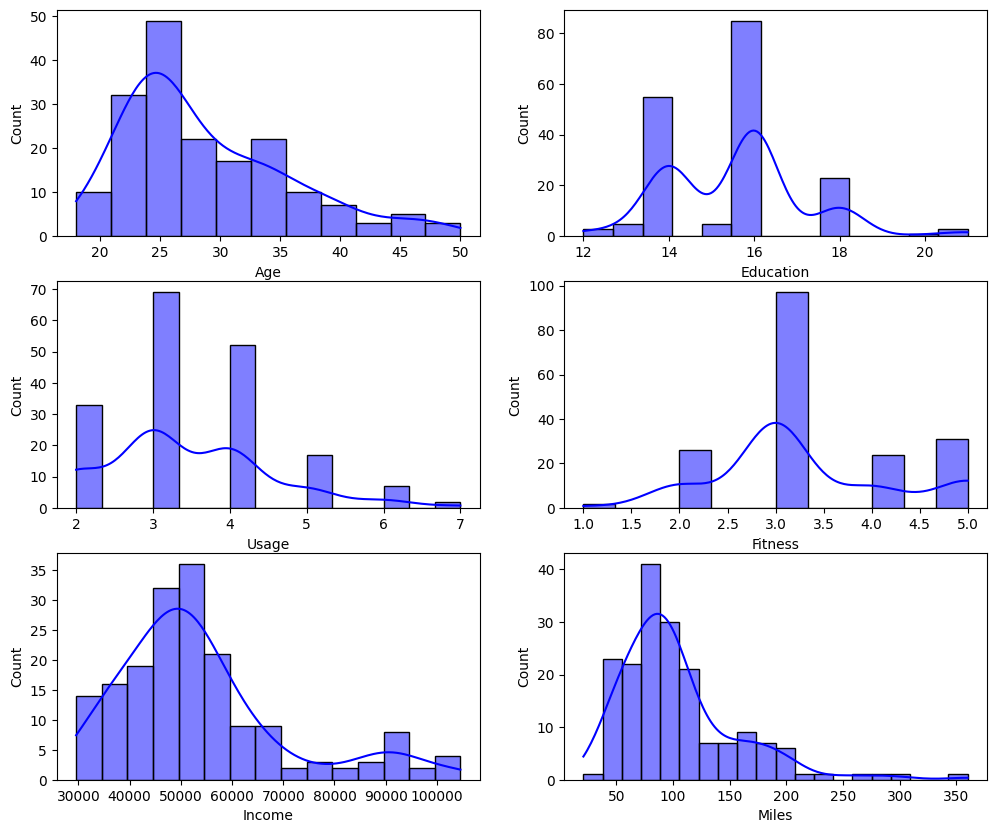

In [ ]:
fig,axis= plt.subplots(3,2 , figsize=(12,10))
sns.histplot(df, x="Age",color="blue", ax=axis[0,0], kde=True)
sns.histplot(df, x="Education",color="blue", ax=axis[0,1], kde=True)
sns.histplot(df, x="Usage",color="blue", ax=axis[1,0], kde=True)
sns.histplot(df, x="Fitness",color="blue", ax=axis[1,1], kde=True)
sns.histplot(df, x="Income",color="blue", ax=axis[2,0], kde=True)
sns.histplot(df, x="Miles",color="blue", ax=axis[2,1], kde=True)

plt.show()

Insights on Univariate analysis of the Numerical Variable -
- Most of the buyers are in their mid twenties and are more inclined towards fitness and they are potential buyers.
- Most of them use the treadmill atleast thrice a week.
- Most of the Buyers have a weekly miles average of 100 miles.  

# 2.2 Detecting Outliers

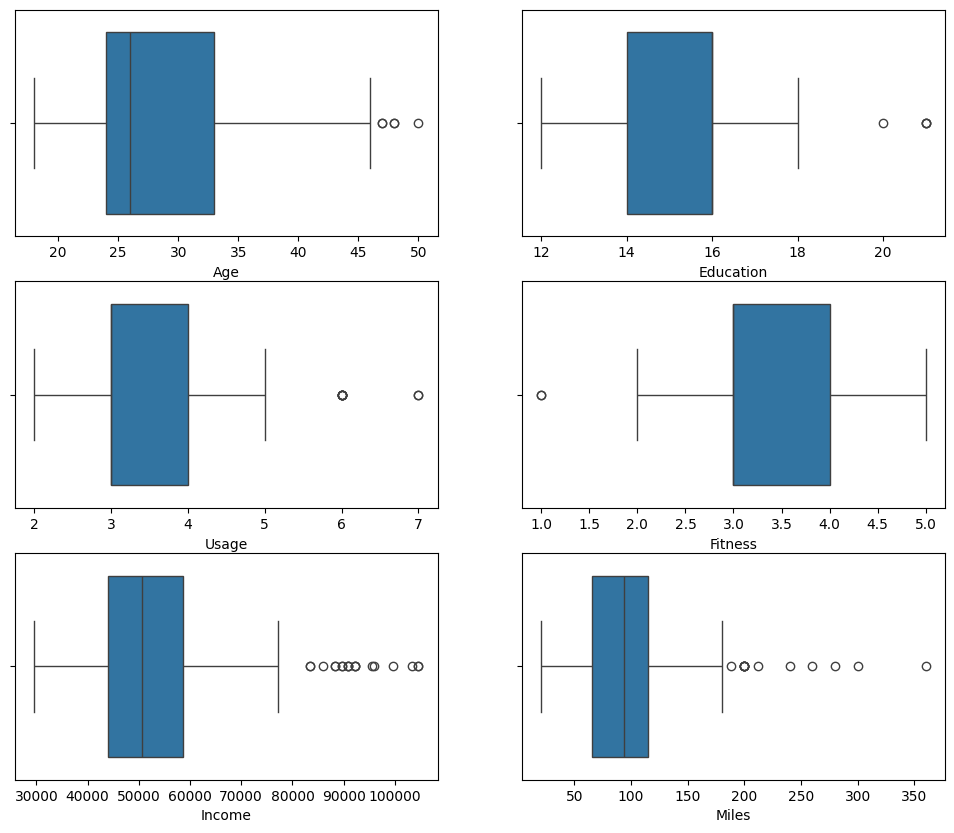

In [ ]:
fig, axis= plt.subplots(3,2 , figsize=(12,10))
sns.boxplot(data=df,x="Age", ax=axis[0,0])
sns.boxplot(data=df,x="Education", ax=axis[0,1])
sns.boxplot(data=df,x="Usage", ax=axis[1,0])
sns.boxplot(data=df,x="Fitness", ax=axis[1,1])
sns.boxplot(data=df,x="Income", ax=axis[2,0])
sns.boxplot(data=df,x="Miles", ax=axis[2,1])
plt.show()

Insights based on the outliers in the Numerical Variables-
- We have lot of outliers in the "Income" and "Miles" column and it is a very good sign.
- This means that even the customers who have a great spending capability are inclined towards buying aerofit.
- People who run more than 200 miles a week and over 350 miles a week also prefer aerofit.
- This means that the aerofit product is of good quality and relatively affordable because it is bought by people on both spectrums of income and Usage.

# 2.2 Categorical Variable

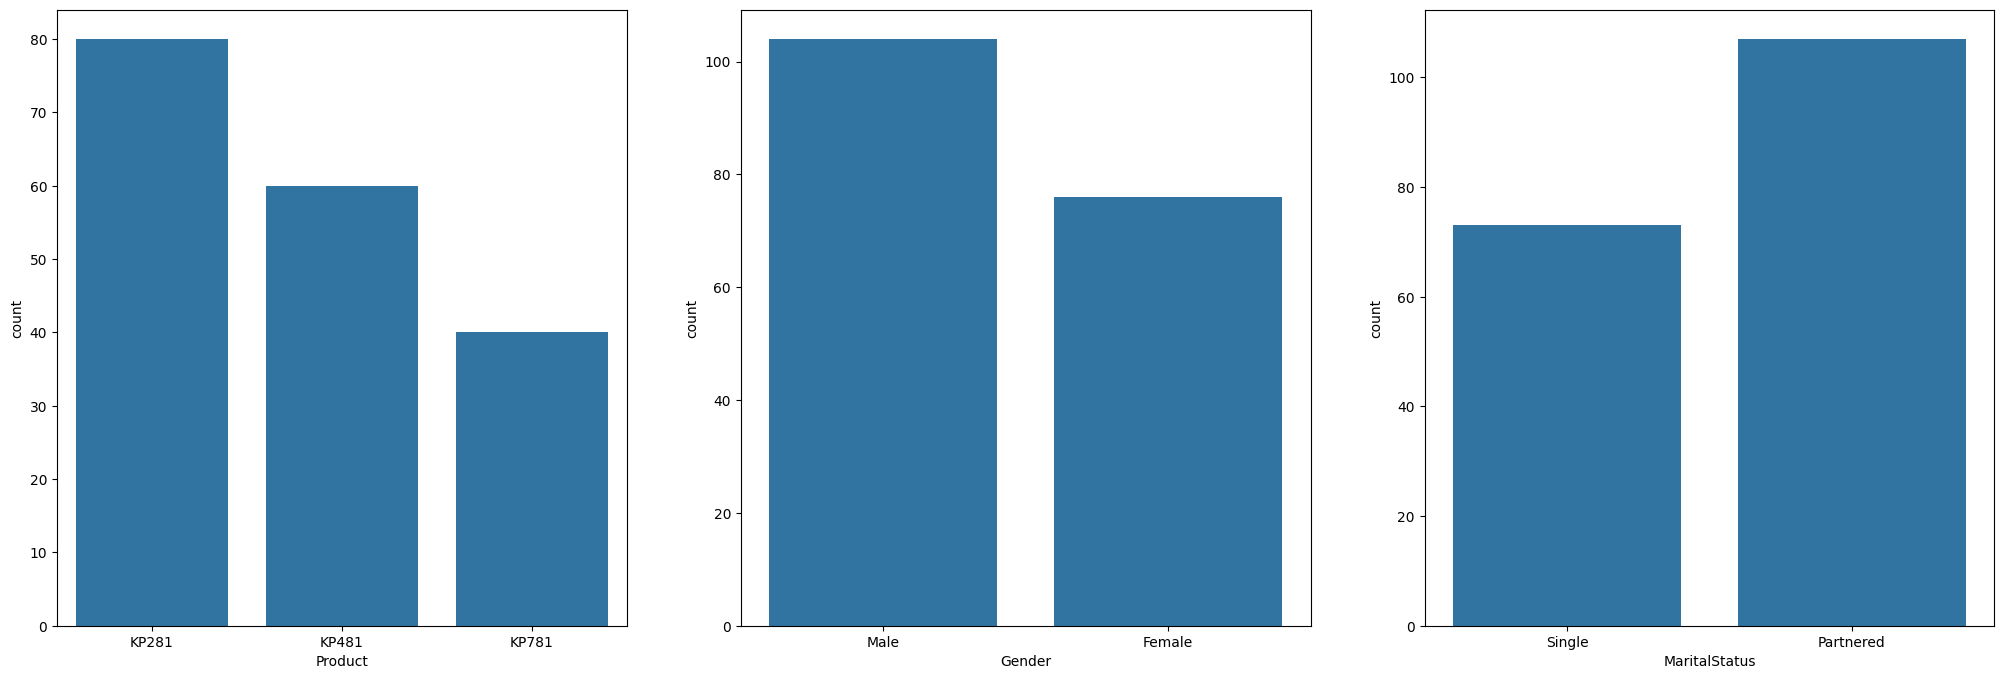

In [ ]:
fig, axs= plt.subplots(1,3 , figsize=(25,8))
sns.countplot(data=df,x='Product',ax=axs[0])
sns.countplot(data=df,x='Gender',ax=axs[1])
sns.countplot(data=df,x='MaritalStatus',ax=axs[2])
plt.show()

Insights on univariate analysis on categorical variable-
- KP281 is the most bought product. Almost 44.44%.
- There are more 'Male' customers in our dataset. Almost 57.78%.
- More Married people tend to buy the treadmill which makes sense with limited leisure time and added responsibilities. Almost 59.44%.

# 3. Multivariate Analysis on Product Preference


# 3.1 Product Type Analysis

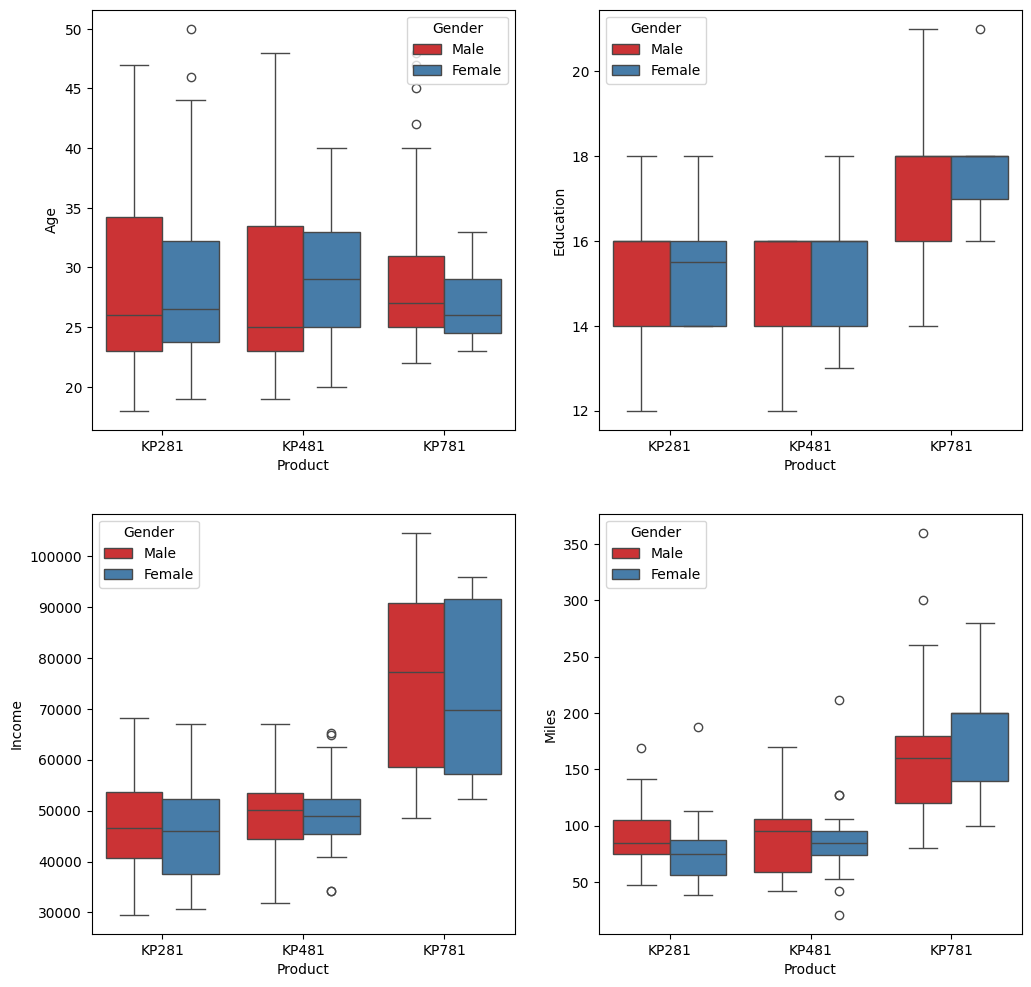

In [ ]:
fig, axis = plt.subplots(2,2, figsize=(12,12))
sns.boxplot(df, x="Product", y="Age", ax=axis[0,0], hue= 'Gender', palette='Set1')
sns.boxplot(df, x="Product", y="Education", ax=axis[0,1], hue= 'Gender', palette='Set1')
sns.boxplot(df, x="Product", y="Income", ax=axis[1,0], hue= 'Gender', palette='Set1')
sns.boxplot(df, x="Product", y="Miles", ax=axis[1,1], hue= 'Gender', palette='Set1')
plt.show()

Insights on Bivariate Analysis on Numerical Variables-
- People who are serious about their health buy the KP781 model which have the highest miles per week and extreme outliers like 350 miles a week.
- Also people with money to spend buy the same KP781.
- Same with people who have finished higher education prefers this particular model 'KP781'.
- With this emprical data we can say the modedl KP781 is the most sorted and reliable of the bunch.

# 3.2 Most Reliable Product - Product Preferred by High Intense/Consistent/Disciplined Customers

<ipython-input-16-f2ccb7fe3789>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="Product", y="Usage", ax=axis[0], palette='Set1')
<ipython-input-16-f2ccb7fe3789>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="Product", y="MilesPerSession", ax=axis[1], palette='Set1')
<ipython-input-16-f2ccb7fe3789>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df, x="Product", y="Fitness", ax=axis[2], palette='Set1')


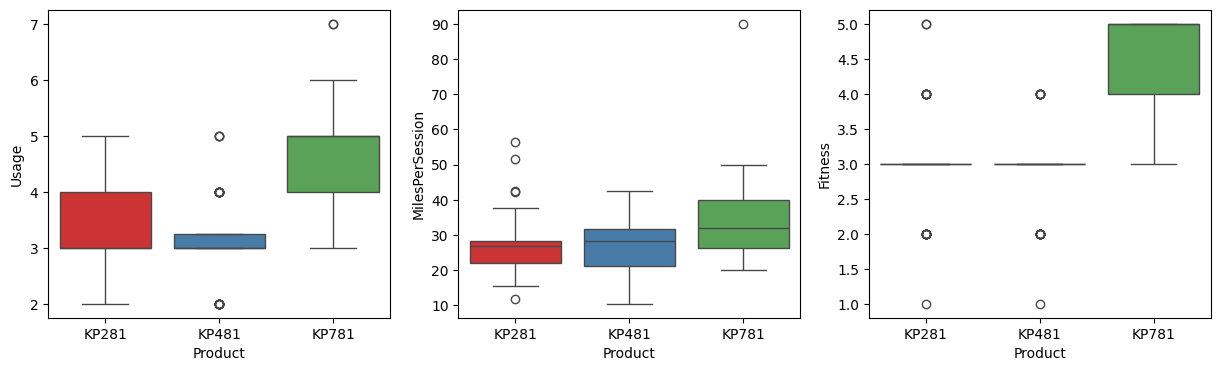

In [ ]:
fig, axis = plt.subplots(1,3, figsize=(15,4))
sns.boxplot(df, x="Product", y="Usage", ax=axis[0], palette='Set1')
sns.boxplot(df, x="Product", y="MilesPerSession", ax=axis[1], palette='Set1')
sns.boxplot(df, x="Product", y="Fitness", ax=axis[2], palette='Set1')
plt.show()

Insights based on the preference of fitness intense customers-
- Customers who uses the treadmill atleast 4 times and upto 7 prefers the KP781.
- Customers who clocks in serious miles per session also prefers the KP781 which proves it to be reliable time and time again after the previous analysis.
- Buyers that are serious that rated high on the fitness scale also prefers thw KP781.

# 4. Correlation among different factors

# 4.1 Pairplot

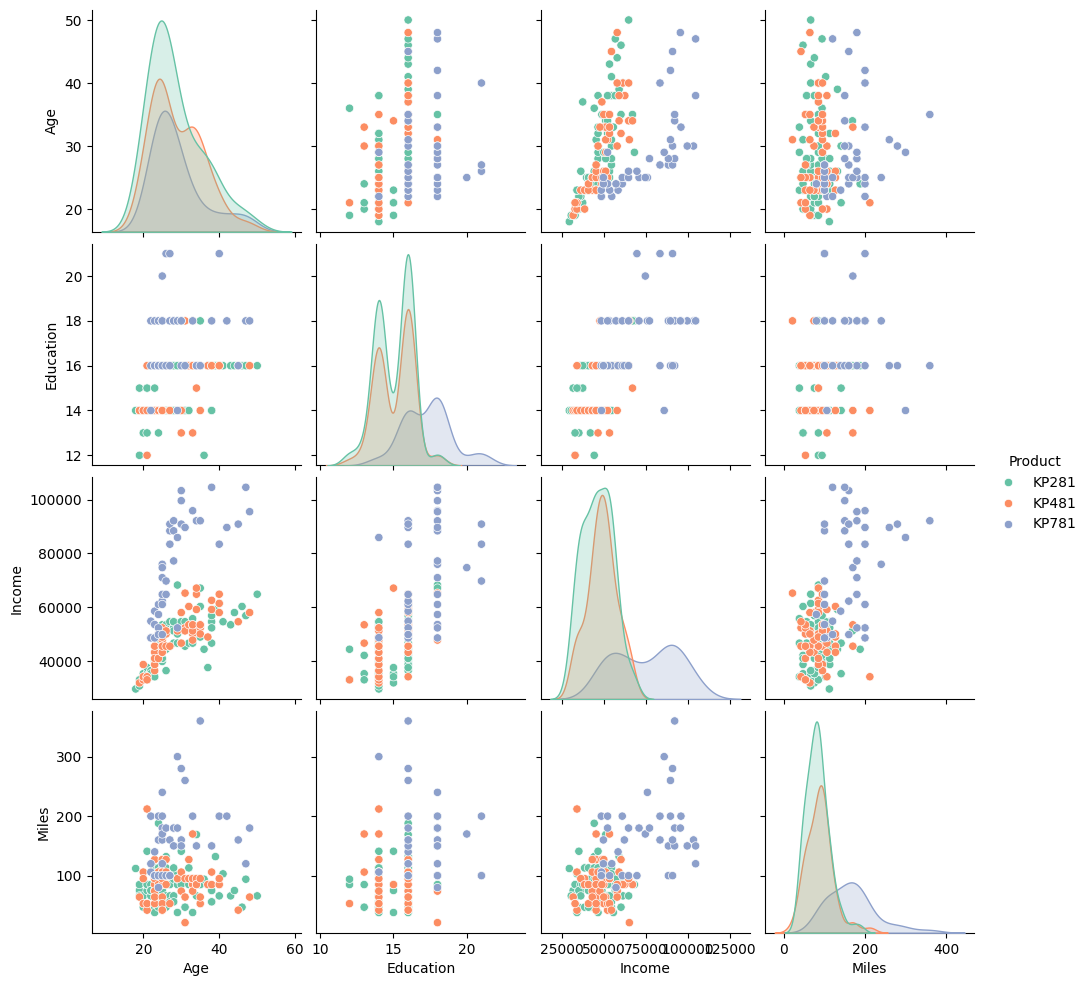

In [ ]:
df_corr = df[['Product', 'Age','Education','Income','Miles']]

sns.pairplot(df_corr, hue ='Product', palette= 'Set2')
plt.show()

# 4.2 Heatmap

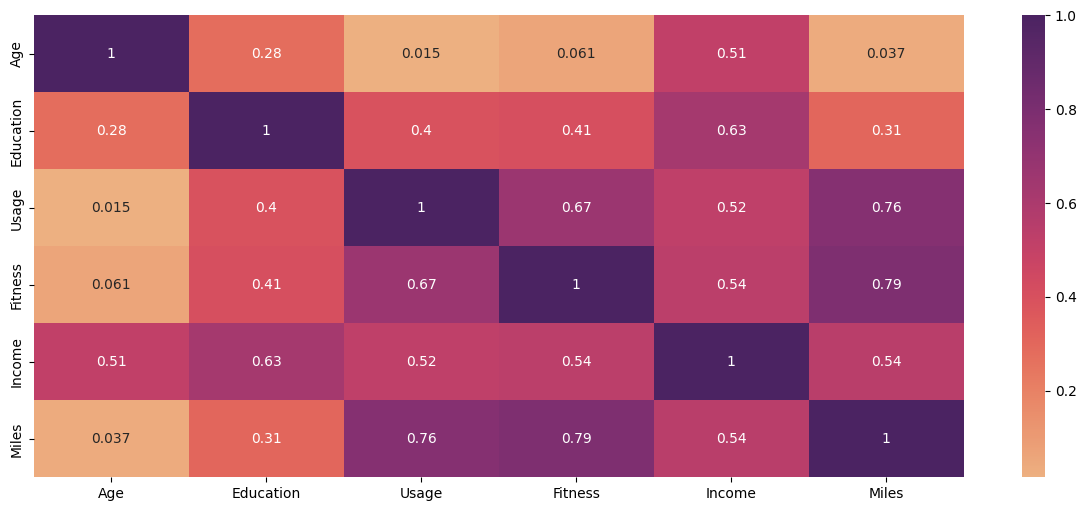

In [ ]:
corr_matrix = df[['Age','Education','Usage','Fitness','Income','Miles']].corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr_matrix,annot = True, cmap="flare")
plt.show()

# 5. Representing the Probability - Marginal and Conditional Probability

# 5.1 Probability of each product being purchased given Age parameter

In [ ]:
pd.crosstab(index =df['Product'],columns = df['age_category'],margins = True,normalize = True ).round(2)

age_category,Young Adult,Adult,Middle Age,All
Product,,,,
KP281,0.19,0.22,0.03,0.44
KP481,0.16,0.17,0.01,0.33
KP781,0.09,0.11,0.02,0.22
All,0.44,0.49,0.07,1.00


# 5.2 Probability of each product being purchased given Gender parameter

In [ ]:
pd.crosstab(index =df['Product'],columns = df['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


# 5.3 Probability of each product being purchased given Educational parameters

In [ ]:
pd.crosstab(index =df['Product'],columns = df['Education_level'],margins = True,normalize = True ).round(2)

Education_level,Primary,Secondary,Higher Education,All
Product,,,,
KP281,0.01,0.21,0.23,0.44
KP481,0.01,0.14,0.18,0.33
KP781,0.00,0.01,0.21,0.22
All,0.02,0.36,0.62,1.00


# 5.4 Probability of each product being purchased given the Marital Status

In [ ]:
pd.crosstab(index =df['Product'],columns = df['MaritalStatus'],margins = True,normalize = True ).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


# 5.5 Probability of each product being purchased based on customer usage pattern

In [ ]:
pd.crosstab(index =df['Product'],columns = df['Usage'],margins = True,normalize = True ).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


# 5.6 Probability of each product being purchased based on Customer Fitness

In [ ]:
pd.crosstab(index =df['Product'],columns = df['Fitness'],margins = True,normalize = True ).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


# 5.7 Probability of each product being purchased given Income parameter

In [ ]:
pd.crosstab(index =df['Product'],columns = df['Income_category'],margins = True,normalize = True ).round(2)

Income_category,Low Income,Average Income,High Income,Very High Income,All
Product,,,,,
KP281,0.04,0.37,0.03,0.00,0.44
KP481,0.03,0.26,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.08,0.69,0.13,0.11,1.00


- The probability of a product being picked can be easily found using the above section as each product is correlated against all the potential features that contributes towards picking a specific product. It is done using the crosstab function.

# 6. Customer Profiling

Aerofit offers three models in the treadmill segment.
- KP281
- KP481
- KP781

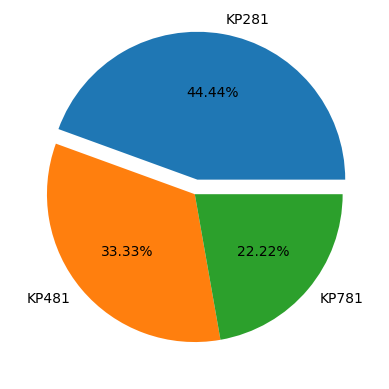

In [ ]:
data = [44,33,22]
labels = ['KP281','KP481','KP781']
explode=[0.1,0,0]
plt.pie(data, labels = labels, explode= explode, autopct = '%0.2f%%')
plt.show()

- Based on the previous analysis KP is the overall best seller with 44% likeability across the market.

# 6.1 **Key metrics for profiling and catergorisation of customers**
- Age Categorisation
  1. Young Adult: from 18 - 25
  2. Adults: from 25 - 40
  3. Middle Aged Adults: 40-60
  4. Old Age: 60 and above
- Categorisation based on years spent on Education
  1. Primary Education: upto 12
  2. Secondary Education: 12 to 15
  3. Higher Education: 15 and above
- Classifying the Income into different tiers
  1. Low Income - 25,000 - 35,000
  2. Average_Income - 35,000 to 60,000
  3. High Income - 60,000 to 80,000
  4. Very High Income - 80,000 - 200,000



# 6.2 Profiling the Potential buyers for each Product

# 6.2.1 Customer Profile for KP281 Treadmill
- Age -> Customers are Young adults and Adults
- Gender -> Gender doesn't have much bearing on product preference
- Education -> People who completed Secondry Education and above
- Usage per week -> 2 to 4 times
- Fitness Scale -> Moderarely active to Active people
- Weekly Miles -> 50 to 100 miles with rare cases of upto 180 miles at times

**Charecteristics of the KP281**
- Entry level product highly preferred in the available treadmill lineup with overall sales 44%.
- People who are students and people who are getting into fitness will most probably prefer the model.
- Super reliable with basic features and worth the money.   

# 6.2.2 Customer Profile for KP481 Treadmill
- Age -> Customers are Young adults and Adults
- Gender -> Gender doesn't have much bearing on product preference
- Education -> People who completed Secondry Education and above
- Usage per week -> 2 to 4 times
- Fitness Scale  -> Moderarely active to Active people
- Weekly Miles-> 50 to 100 miles with outliers upto 200 miles

**Charecteristics of the KP481**
- Mid level product with overall sales of 33%.
- People who are students and people who are getting into fitness with limited sum to spend will most probably prefer the model.
- Super reliable with better features and worth the money

# 6.2.3 Customer Profile for KP781 Treadmill
- Age -> Customers are Young adults and Adults
- Gender -> Male customers tend to prefer this product that female.
- Education-> People who have completed their Higher education with dispensable cash prefers this model.
- Usage per week -> 4 to 7 times
- Fitness Scale -> Active people, competitive runners and Fitness enthusiasts
- Weekly Miles -> in the range of 100 miles to 250 miles with max of 350 miles per week and 90 miles per session records.

**Charecteristics of the KP781**
- Premium product with overall sales of 22% but in term of sales brings in same amount of income as the best selling product of the lineup.
- People that are super serious about fitness and people who quite eduacated with dispensable cash prefers this model
- Professional level, Super reliable, high build quality with best features in the market.


# 7. Recommendations


# 7.1 Recommendations for KP281-
 - Since most of the target customers are students who are young or new to fitness with limited income.
 - It would be great to advertise this product with cool features that can attract students and young people. The product should be endorsed by social media celebrities and should be promoted on social media instead of conventional approach.
 - Special discounts for students and exhibitions on schools and colleges.





# 7.2 Recommendations for KP481-
- The same approach as above can be used here since they have almost the same target customers.
- This product can be used to upsell or set a price ina way that feels it is good choice to select the mid tier product instead of the entry level product which is the KP281.




#7.3 Recommendations for KP781-
- Should be promoted as premium product with features like mobile integration or sports person endorsement.
- Since the target customers are from high educational, income and fitness background.
- Also this particular product is mostly preferred by male customers with serious fitness levels, so little money can be invested to add some features and increase the selling price.
